# Incidence

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from structure import Structure
import json
import matplotlib.patches as patches
from matplotlib.ticker import FixedFormatter

In [2]:
plt.rcParams.update(
        {
            "font.size": 16,
            "axes.labelsize": 16,
            "axes.titlesize": 16,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            "legend.fontsize": 14,
            "font.family": "arial",
        }
    )

In [3]:
eps_prism = 5.5

payload = json.dumps({
    "ScenarioData": {
    "type": "Incident",
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Isotropic Middle-Stack Layer",
        "thickness": 1.5
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 90.,
        "rotationZ": 0.,
    }
],
})
payload = json.loads(payload)

structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[2]

x_axis = np.round(np.degrees(structure.incident_angle), 1)
frequency = structure.frequency

In [4]:
airgap = structure.layers[1].profile
quartz = structure.layers[2].profile

In [5]:
quartz_eps =  structure.layers[2].eps_tensor[:,tf.newaxis,:,:]

In [6]:
kx = tf.cast(structure.layers[2].kx, tf.complex128)

In [7]:
kz2 = airgap.transmitted_k_z[tf.newaxis,:,1]
kz3 = quartz.transmitted_k_z[:,:,1]

AttributeError: 'dict' object has no attribute 'transmitted_k_z'

In [ ]:
x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64))
x_axis = tf.cast(x_axis, tf.complex128)

In [ ]:
kz2.shape

TensorShape([1, 180])

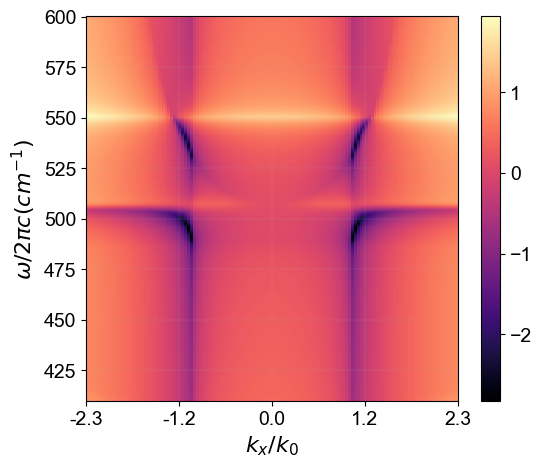

In [ ]:
fig, axs = plt.subplots(figsize = (6,5))
x_label = r'$k_x/k_0$'
y_label = "$\omega/2\pi c (cm^{-1})$"

equation = (kz3 * quartz_eps[...,2,2] + x_axis * quartz_eps[...,0,2])/(quartz_eps[...,0,0] * quartz_eps[...,2,2] - quartz_eps[...,0,2]**2.)
full_equation = tf.math.log(tf.abs(kz2 + equation))

im1 = axs.pcolormesh(tf.math.real(x_axis), tf.math.real(structure.frequency), full_equation, cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs)
#cbar1.set_label('$\\theta_2$')
axs.grid(linewidth=0.1)
axs.set_xlabel(x_label)
axs.set_ylabel(y_label)

# Define your own ticks here. You can choose the range and step that fits your data.
ticks = np.linspace(tf.reduce_min(tf.math.real(x_axis)), tf.reduce_max(tf.math.real(x_axis)), num=5)  # Adjust 'num' for the number of ticks you want
tick_labels = [f'{tick:.1f}' for tick in ticks]  # Format the labels to one decimal place

# Set the ticks and labels
axs.set_xticks(ticks)
axs.xaxis.set_major_formatter(FixedFormatter(tick_labels))  # Force matplotlib to use your formatted labels


# Section

ValueError: Attempt to convert a value (<waves.WaveProfile object at 0x00000266ED415AD0>) with an unsupported type (<class 'waves.WaveProfile'>) to a Tensor.

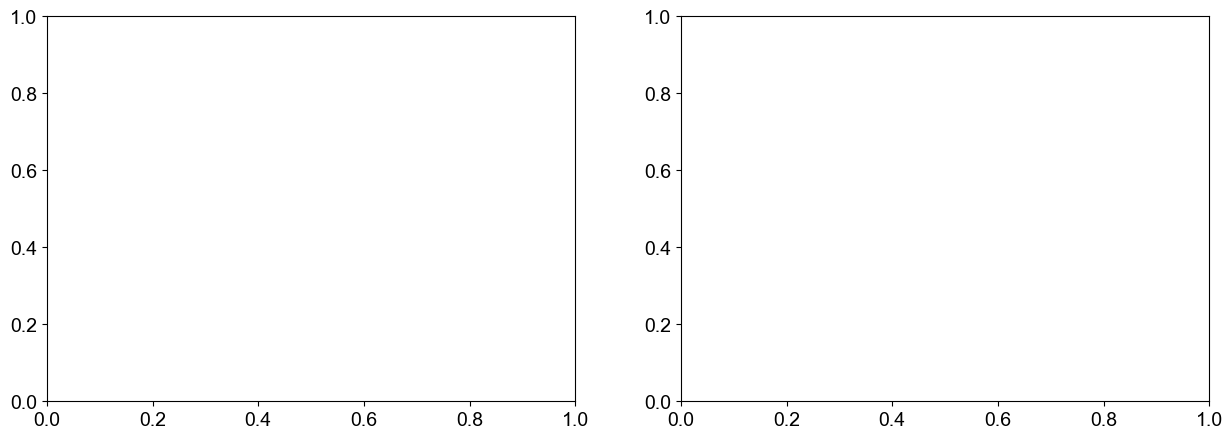

In [11]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag((kz2* tf.ones_like(quartz))[:,:,0]) , cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag((kz2* tf.ones_like(quartz))[:,:,0]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$\\theta_2$')
cbar2.set_label('$\\theta_2$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$\\theta_2$ (Ordinary)')
axs[1].set_title(f'$\\theta_2$(Extraordinary)')


plt.show()

NameError: name 'result' is not defined

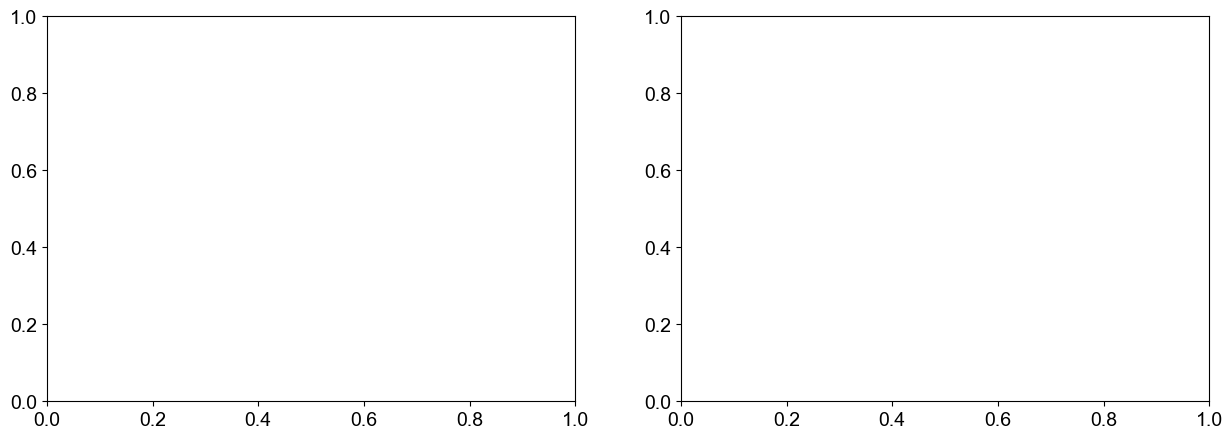

In [14]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs((result)[:,:,0]) , cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs((result)[:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$\\theta_2$')
cbar2.set_label('$\\theta_2$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$\\theta_2$ (Ordinary)')
axs[1].set_title(f'$\\theta_2$(Extraordinary)')


plt.show()

In [15]:
layer.profile

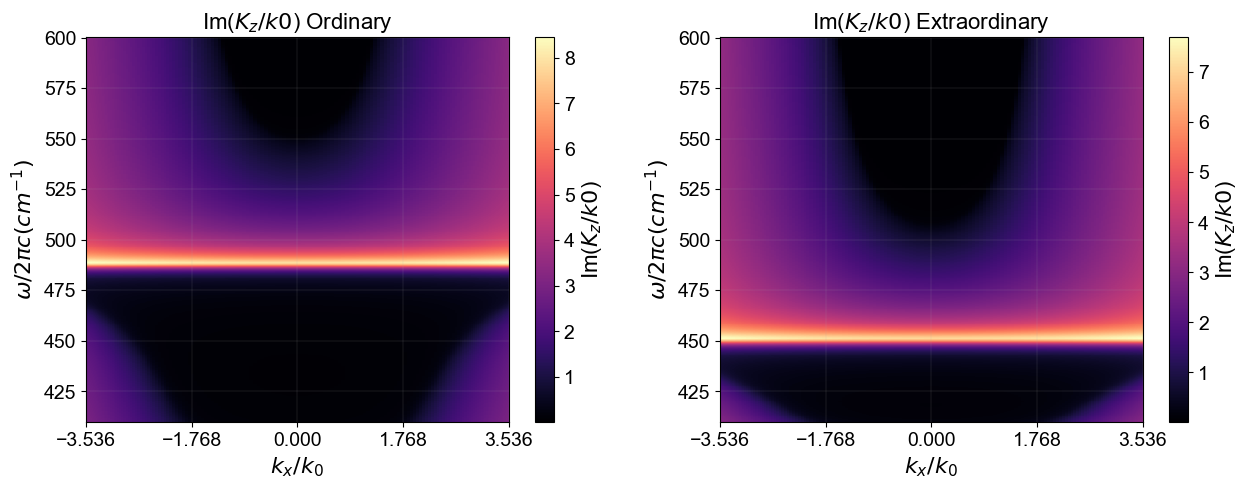

In [11]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile.transmitted_k_z[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile.transmitted_k_z[:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Im($K_z/k0$)')
cbar2.set_label('Im($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Im($K_z/k0$) Ordinary')
axs[1].set_title(f'Im($K_z/k0$) Extraordinary')


plt.show()

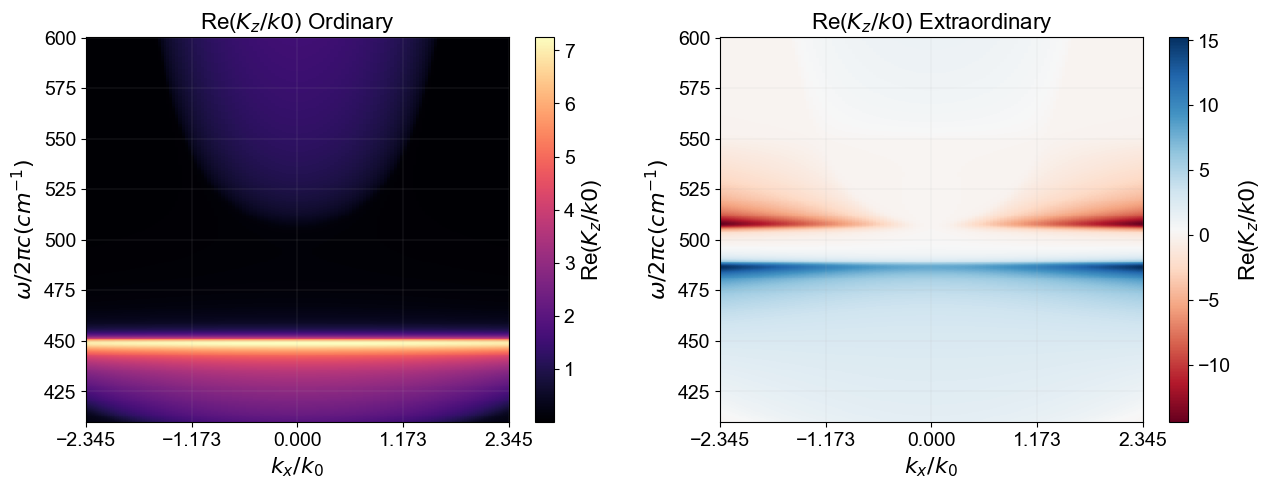

In [17]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile.transmitted_k_z[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile.transmitted_k_z[:,:,1]), cmap='RdBu')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Re($K_z/k0$)')
cbar2.set_label('Re($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Re($K_z/k0$) Ordinary')
axs[1].set_title(f'Re($K_z/k0$) Extraordinary')


plt.show()

NameError: name 'quartz' is not defined

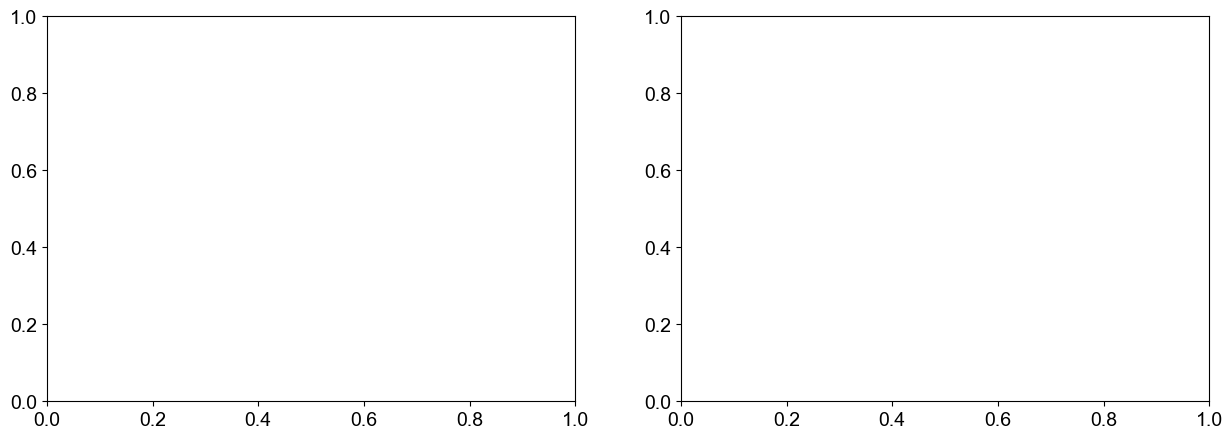

In [8]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(quartz[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(quartz[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ (Ordinary)')
axs[1].set_title(f'$E_x$(Extraordinary)')


plt.show()

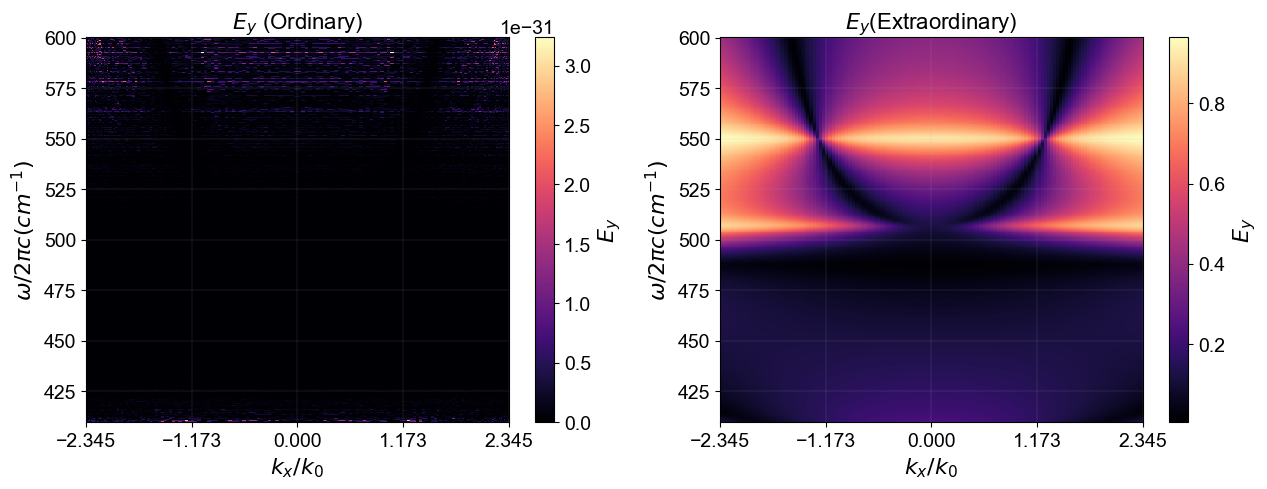

In [22]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_y$')
cbar2.set_label('$E_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_y$ (Ordinary)')
axs[1].set_title(f'$E_y$(Extraordinary)')


plt.show()

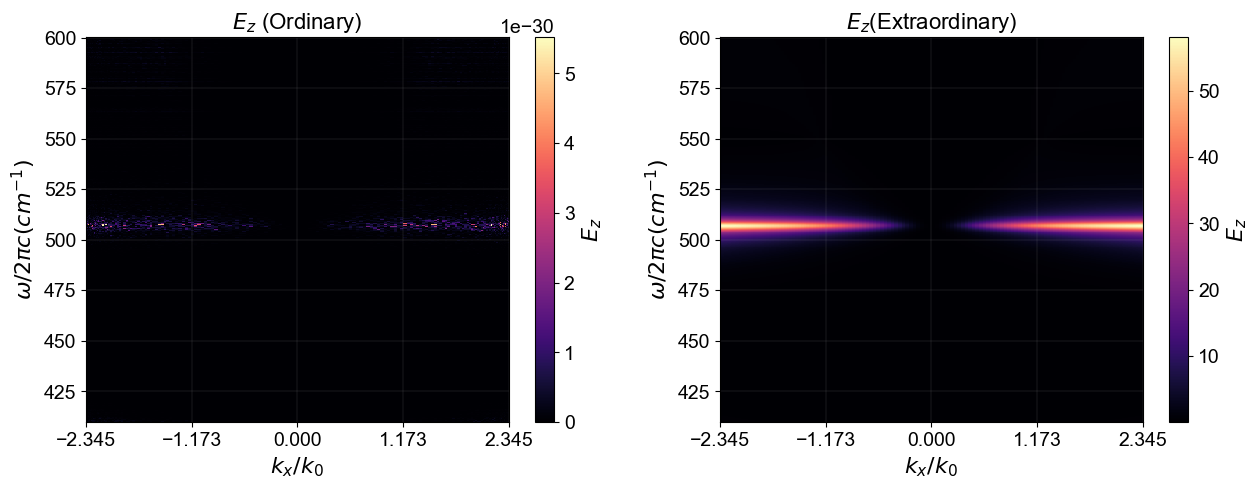

In [12]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_z$')
cbar2.set_label('$E_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_z$ (Ordinary)')
axs[1].set_title(f'$E_z$(Extraordinary)')


plt.show()

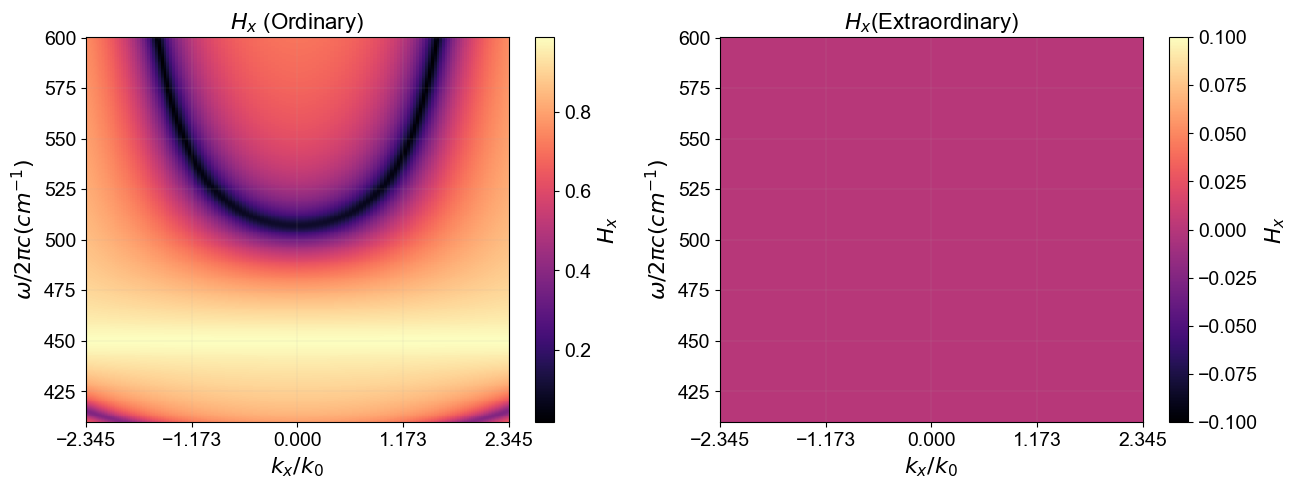

In [13]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_x$')
cbar2.set_label('$H_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_x$ (Ordinary)')
axs[1].set_title(f'$H_x$(Extraordinary)')


plt.show()

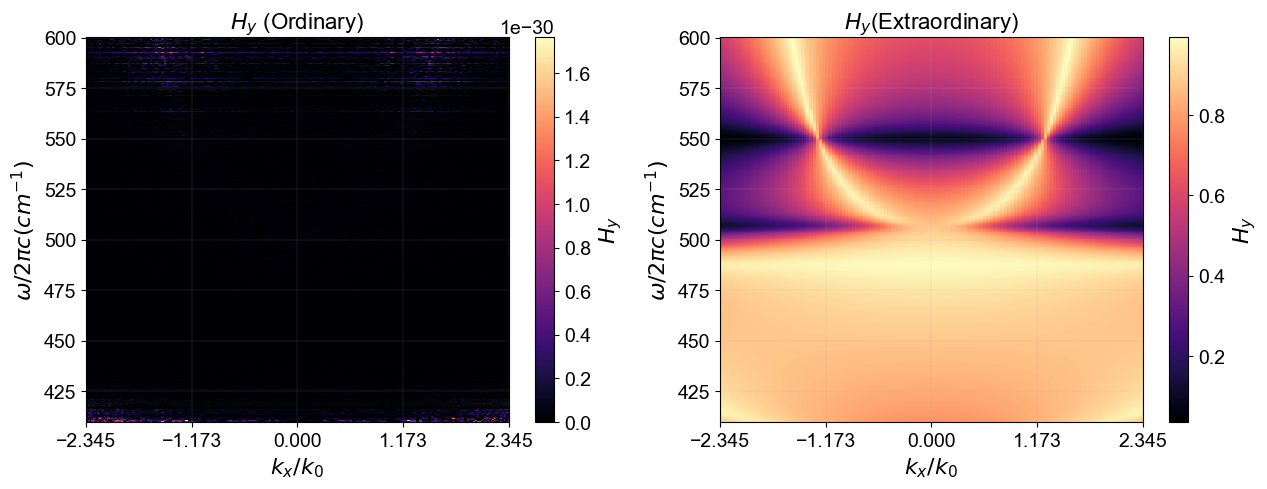

In [14]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_y$')
cbar2.set_label('$H_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_y$ (Ordinary)')
axs[1].set_title(f'$H_y$(Extraordinary)')


plt.show()

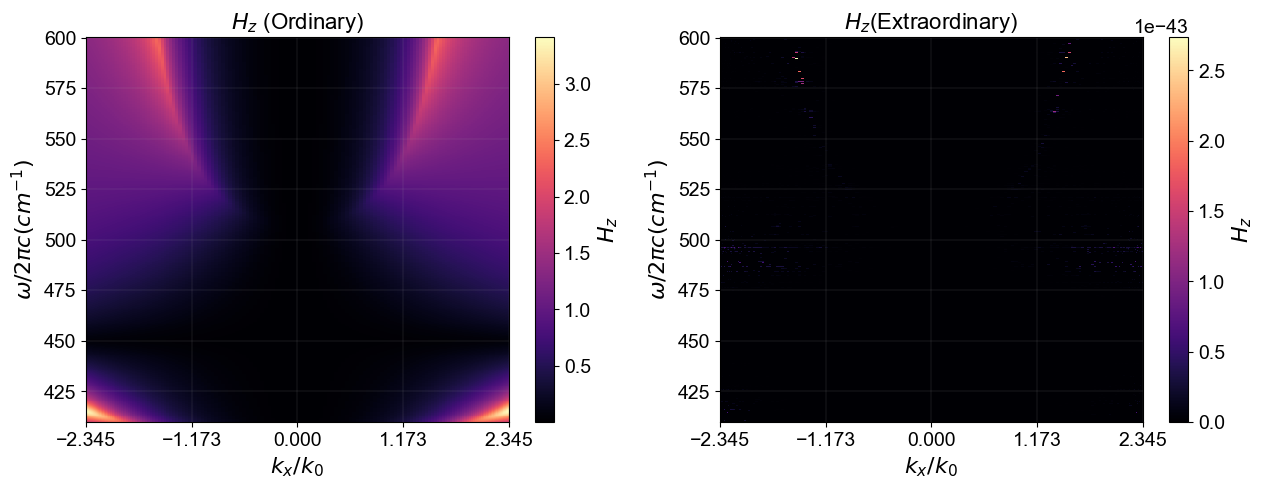

In [15]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_z$')
cbar2.set_label('$H_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_z$ (Ordinary)')
axs[1].set_title(f'$H_z$(Extraordinary)')


plt.show()

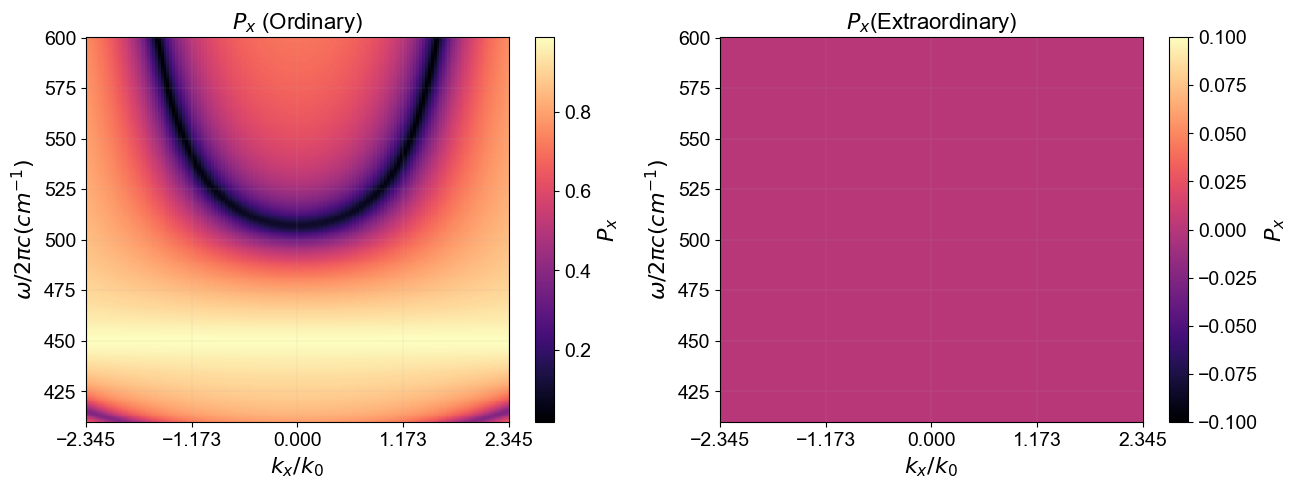

In [19]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_x$')
cbar2.set_label('$P_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_x$ (Ordinary)')
axs[1].set_title(f'$P_x$(Extraordinary)')


plt.show()

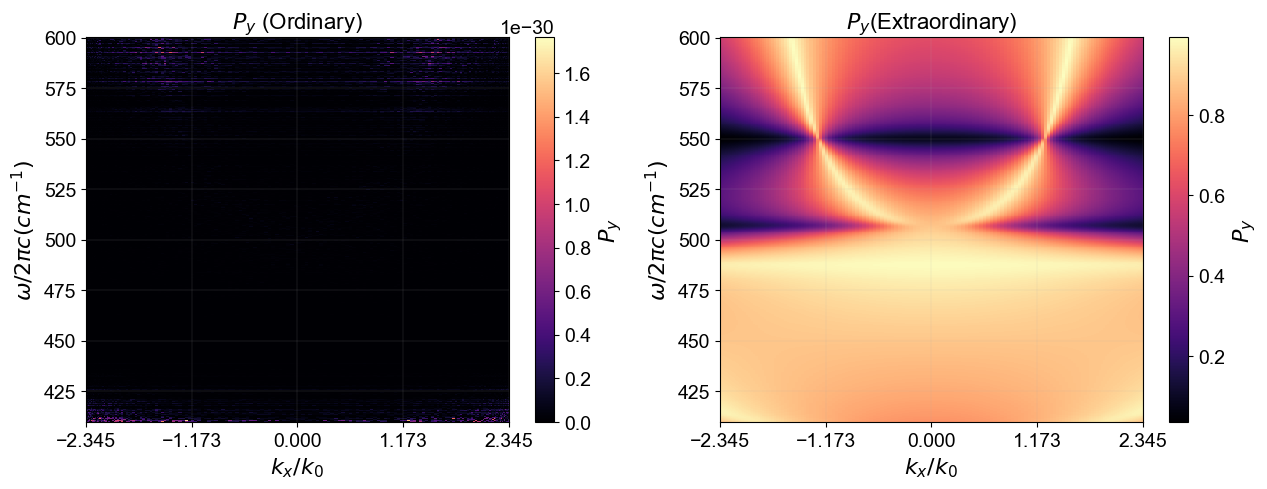

In [20]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_y$')
cbar2.set_label('$P_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_y$ (Ordinary)')
axs[1].set_title(f'$P_y$(Extraordinary)')


plt.show()

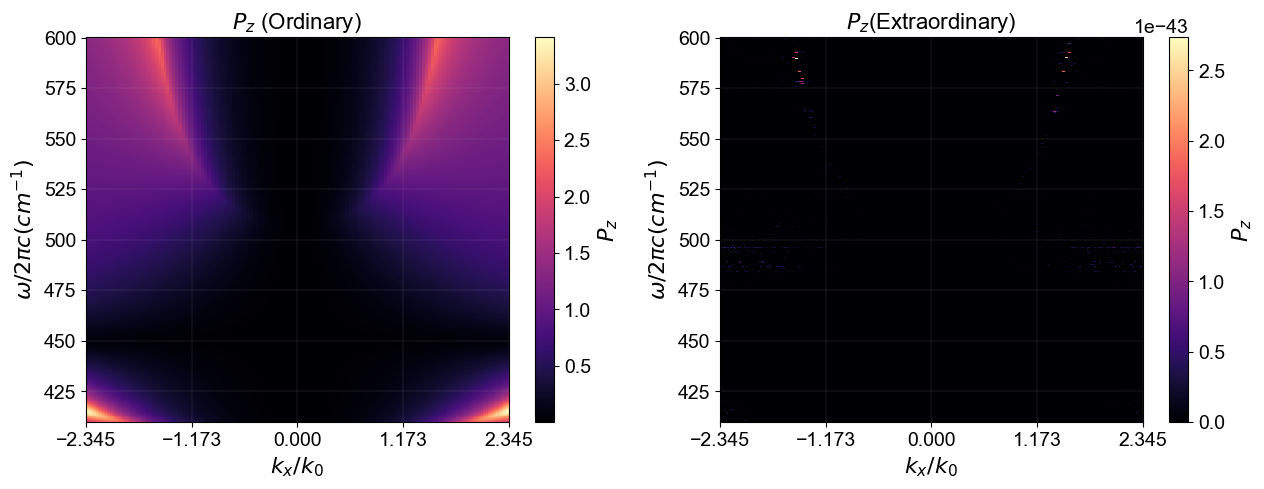

In [21]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_z$')
cbar2.set_label('$P_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ (Ordinary)')
axs[1].set_title(f'$P_z$(Extraordinary)')


plt.show()

# Azimuthal Rotation

In [98]:
payload = json.dumps({
    "ScenarioData": {
    "type": "Azimuthal",
    "incidentAngle": 27.,
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": 5.5
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 80.,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [99]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[1]
layer.profile = layer.profile['transmitted']

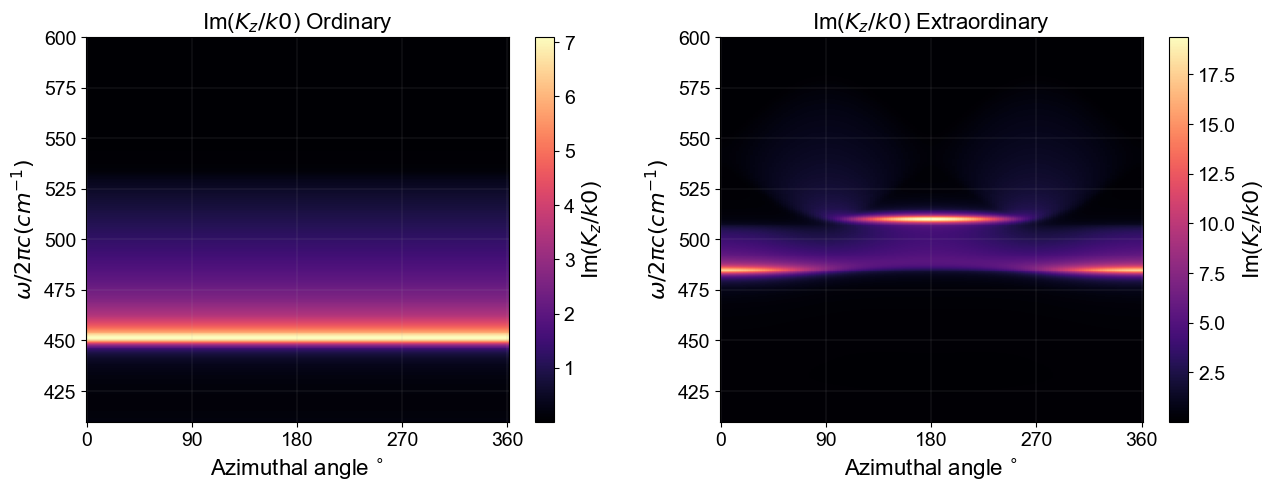

In [100]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Im($K_z/k0$)')
cbar2.set_label('Im($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Im($K_z/k0$) Ordinary')
axs[1].set_title(f'Im($K_z/k0$) Extraordinary')


plt.show()

In [101]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='RdBu')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Re($K_z/k0$)')
cbar2.set_label('Re($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Re($K_z/k0$) Ordinary')
axs[1].set_title(f'Re($K_z/k0$) Extraordinary')


plt.show()

In [102]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ Ordinary')
axs[1].set_title(f'$E_x$ Extraordinary')


plt.show()

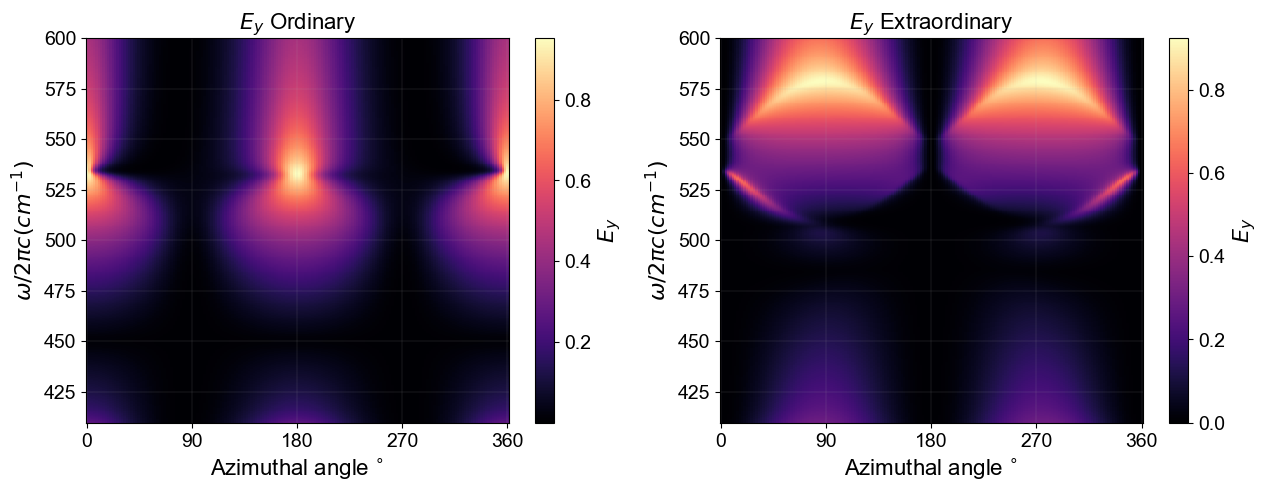

In [103]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_y$')
cbar2.set_label('$E_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_y$ Ordinary')
axs[1].set_title(f'$E_y$ Extraordinary')


plt.show()

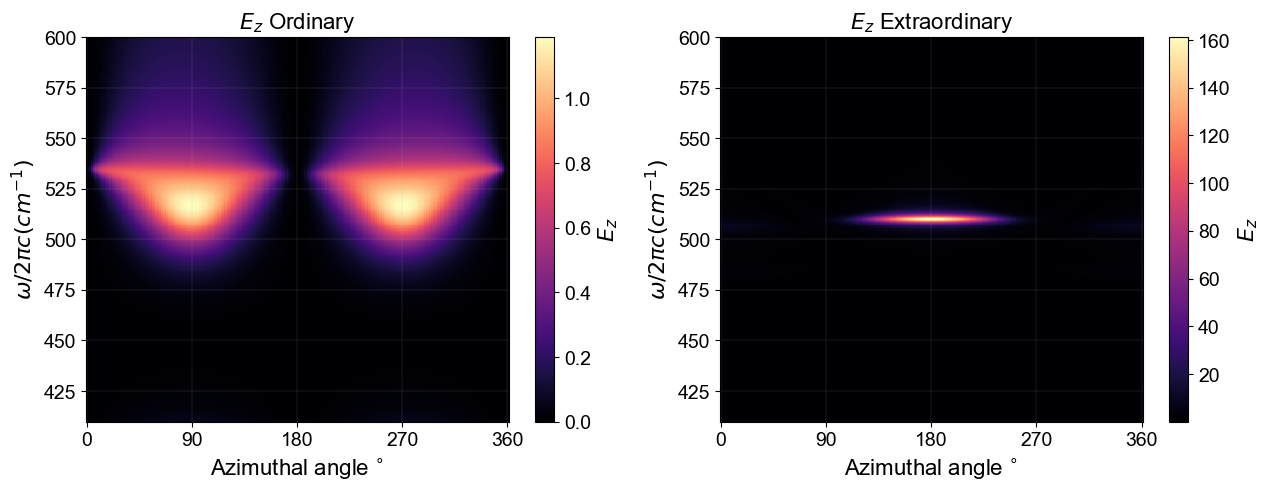

In [104]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_z$')
cbar2.set_label('$E_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_z$ Ordinary')
axs[1].set_title(f'$E_z$ Extraordinary')


plt.show()

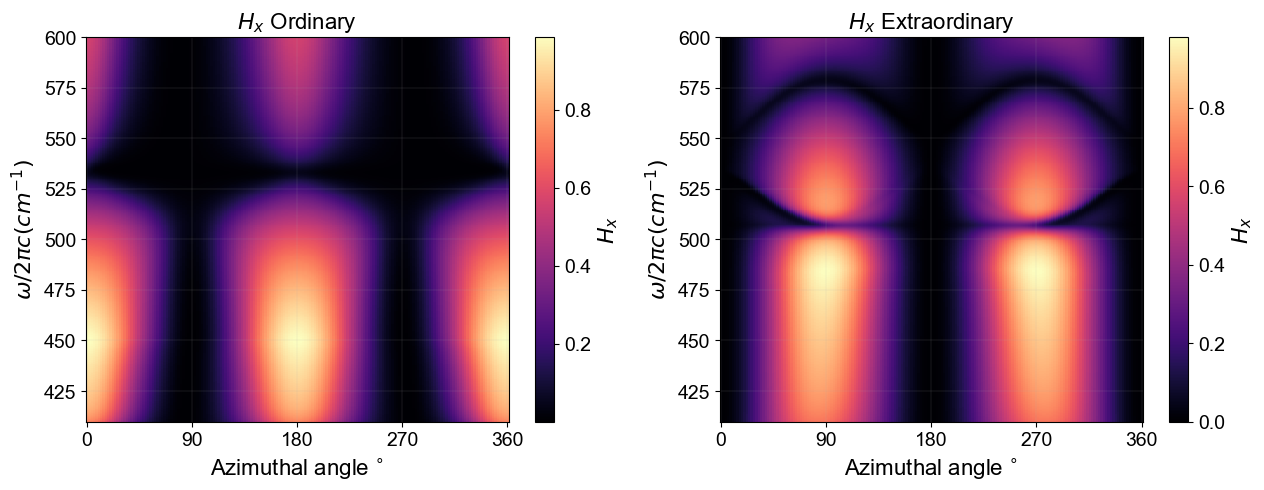

In [105]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_x$')
cbar2.set_label('$H_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_x$ Ordinary')
axs[1].set_title(f'$H_x$ Extraordinary')


plt.show()

In [106]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_y$')
cbar2.set_label('$H_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_y$ Ordinary')
axs[1].set_title(f'$H_y$ Extraordinary')


plt.show()

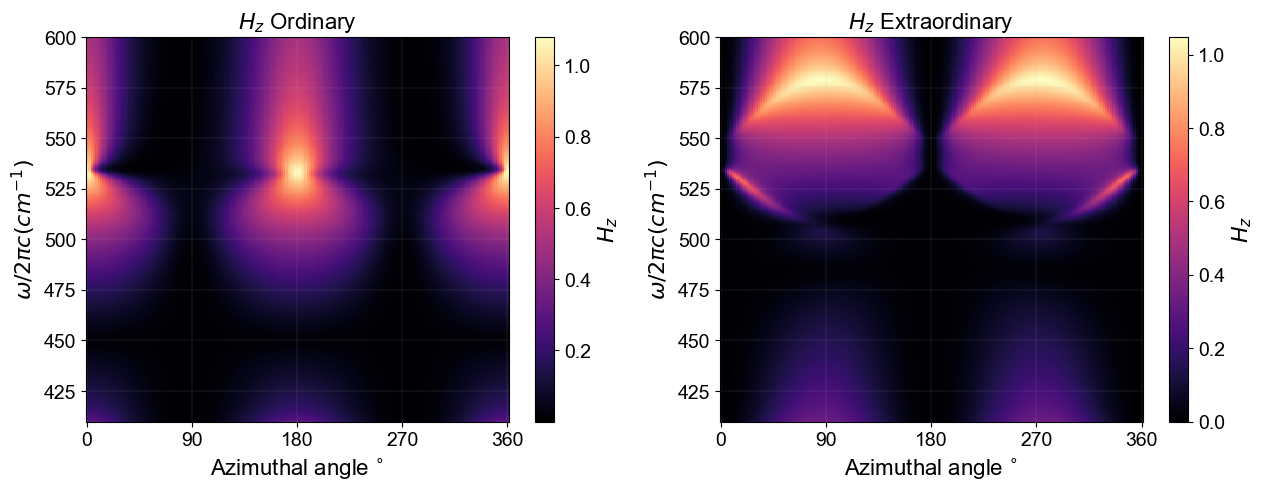

In [107]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_z$')
cbar2.set_label('$H_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_z$ Ordinary')
axs[1].set_title(f'$H_z$ Extraordinary')


plt.show()

In [108]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_x$')
cbar2.set_label('$P_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_x$ Ordinary')
axs[1].set_title(f'$P_x$ Extraordinary')


plt.show()

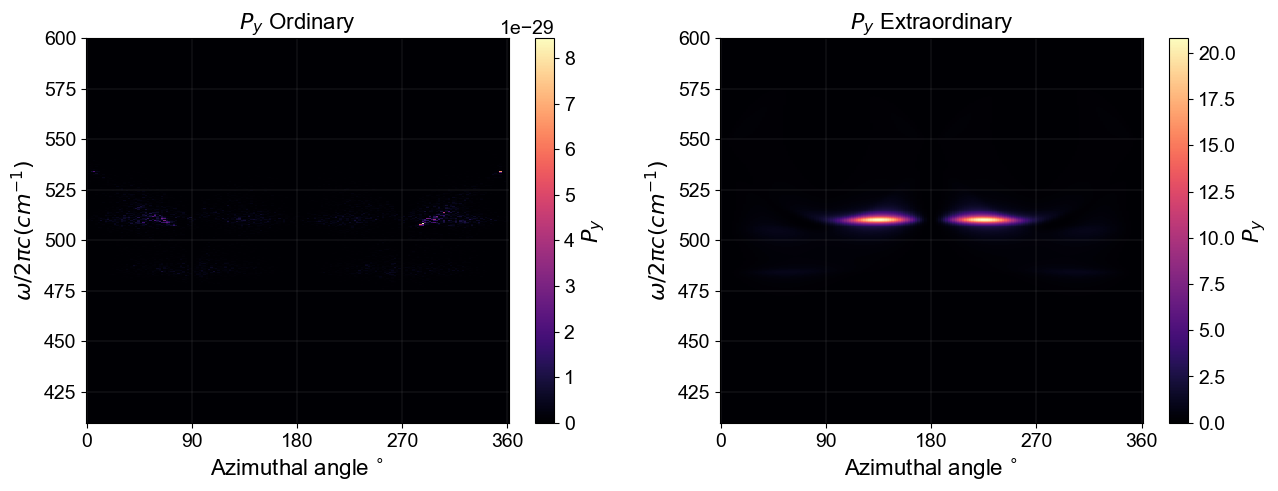

In [109]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_y$')
cbar2.set_label('$P_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_y$ Ordinary')
axs[1].set_title(f'$P_y$ Extraordinary')


plt.show()

In [110]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_z$')
cbar2.set_label('$P_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ Ordinary')
axs[1].set_title(f'$P_z$ Extraordinary')


plt.show()

# Dispersion

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from structure import Structure
import json
import matplotlib.patches as patches
plt.rcParams.update(
        {
            "font.size": 16,
            "axes.labelsize": 16,
            "axes.titlesize": 16,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            "legend.fontsize": 14,
            "font.family": "arial",
        }
    )

In [11]:
eps_prism = 55.5
payload = json.dumps({
    "ScenarioData": {
    "type": "Dispersion",
    "frequency": 540,
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 0.,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[-1]
layer.profile = layer.profile['transmitted']

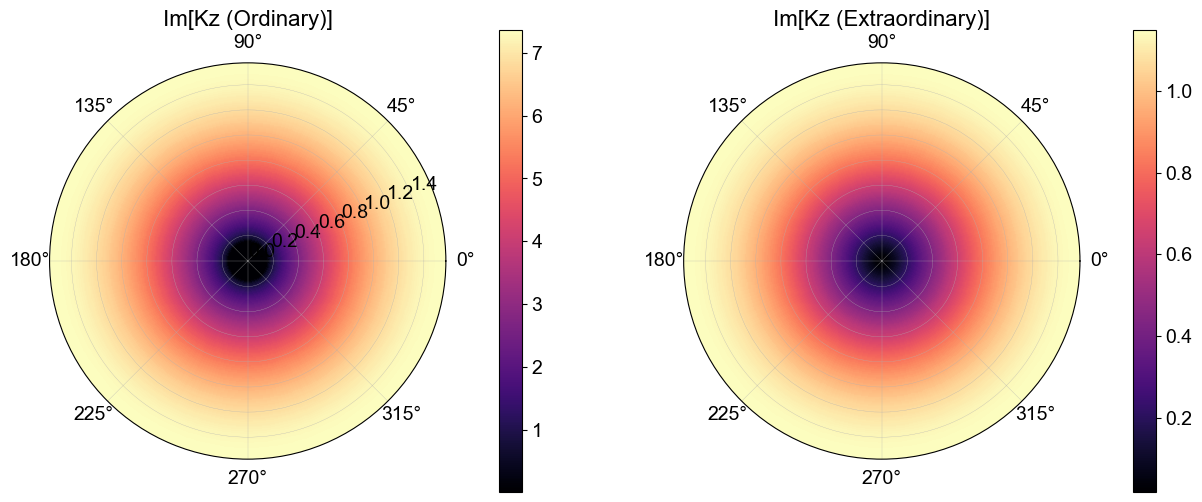

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.01796076, 0.01796076])>

In [12]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[1].set_yticklabels([])
axs[0].set_title('Im[Kz (Ordinary)]')
axs[1].set_title('Im[Kz (Extraordinary)]')
plt.show()

tf.math.imag(layer.profile['propagation'][0,80])

In [13]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Re[Kz (Ordinary)]')
axs[1].set_title('Re[Kz (Extraordinary)]')

Text(0.5, 1.0, 'Re[Kz (Extraordinary)]')

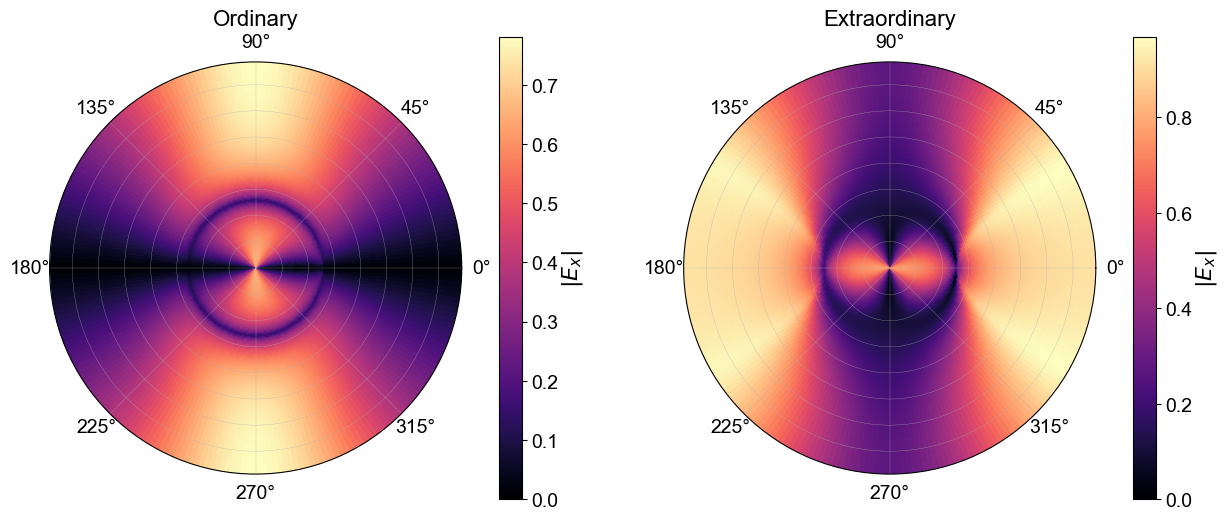

In [114]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ex'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ex'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|E_x|$', labelpad=1)
cbar2.set_label(r'$|E_x|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

plt.show()

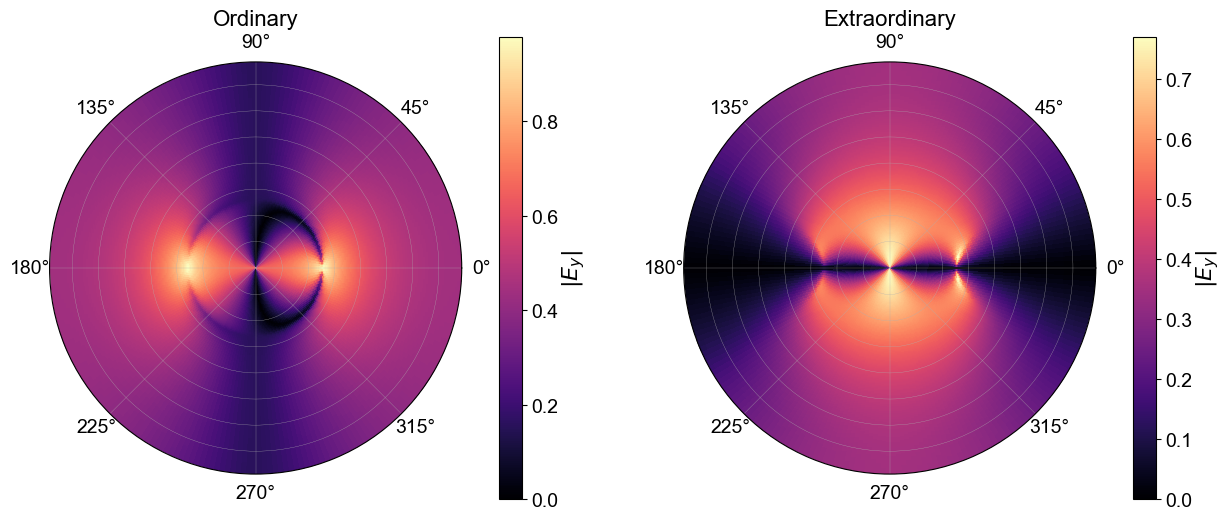

In [115]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ey'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ey'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|E_y|$', labelpad=1)
cbar2.set_label(r'$|E_y|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')
plt.show()

In [116]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ez'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ez'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|E_z|$', labelpad=1)
cbar2.set_label(r'$|E_z|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

In [117]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hx'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hx'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|H_x|$', labelpad=1)
cbar2.set_label(r'$|H_x|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

In [118]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hy'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hy'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|H_y|$', labelpad=1)
cbar2.set_label(r'$|H_y|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

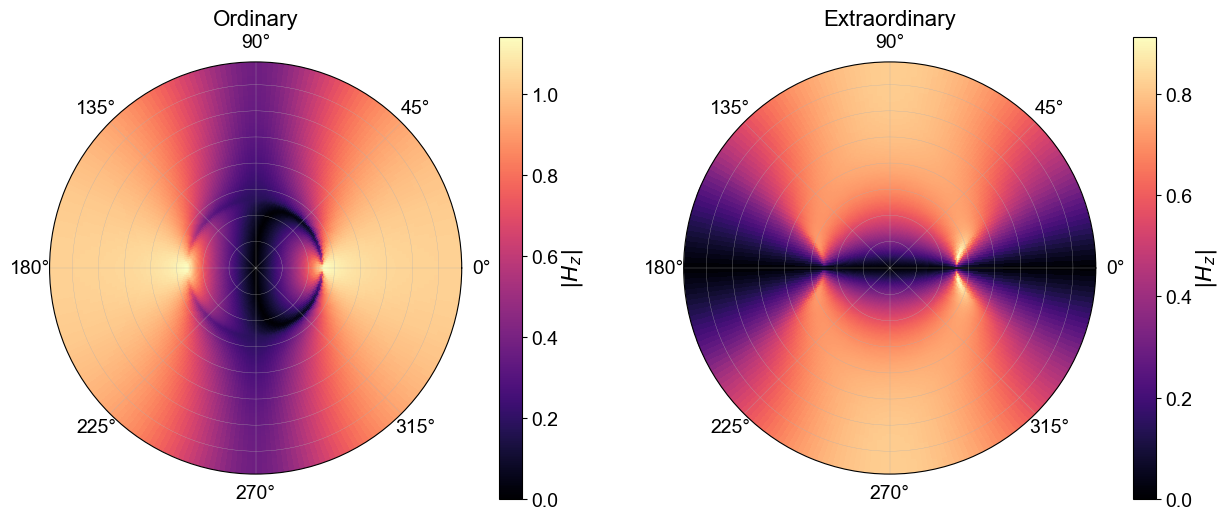

In [119]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hz'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hz'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|H_z|$', labelpad=1)
cbar2.set_label(r'$|H_z|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

In [120]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Px'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Px'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|P_x|$', labelpad=1)
cbar2.set_label(r'$|P_x|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

In [121]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Py'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Py'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|P_y|$', labelpad=1)
cbar2.set_label(r'$|P_y|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

In [122]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Pz'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Pz'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|P_z|$', labelpad=1)
cbar2.set_label(r'$|P_z|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

# Hyperbolic Dispersion Curves

In [86]:
eps_prism = 50.

payload = json.dumps({
    "ScenarioData": {
    "type": "Dispersion",
    "frequency": 460
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 0,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [87]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[-1]
transmitted = layer.profile['transmitted']['propagation']
reflected = layer.profile['reflected']['propagation']

In [88]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import cm

In [89]:
# Create a meshgrid of the azimuthal and incident angles
azimuthal_angles, incident_angles = np.meshgrid(structure.azimuthal_angle, structure.incident_angle)

# Convert to Cartesian coordinates for plotting
X = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.cos(azimuthal_angles)
Y = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.sin(azimuthal_angles)

# Your Z data; for example, transmitted[:,:,1]
Z_transmitted = tf.math.imag(transmitted[:,:,1])
Z_reflected = tf.math.imag(reflected[:,:,1])

# Plot the surface
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_transmitted, cmap= cm.magma)  # Transmitted surface
ax.plot_surface(X, Y, Z_reflected, cmap= cm.magma_r)    # Reflected surface

# Labels
ax.set_xlabel(r'$k_x/k_0$',labelpad = 10)
ax.set_ylabel(r'$k_y/k_0$',labelpad = 10)
ax.set_zlabel(r'$Re[k_z/k_0]$',labelpad = 10)


Text(0.5, 0, '$Re[k_z/k_0]$')

In [51]:
plt.close()